In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import save_model

In [4]:
images = []
ages = []

for image in os.listdir('../data/UTKFace_resized_childfree_48'):
    split = image.split('_')
    if len(split) != 4:
        print(image)
        print(split)
        continue

    ages.append(int(split[0]))  
    images.append(Image.open('../data/UTKFace_resized_childfree_48/' + image))

61_1_20170109142408075.jpg.chip.jpg
['61', '1', '20170109142408075.jpg.chip.jpg']


In [5]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
df = pd.concat([images, ages], axis=1)

In [6]:
df.head(10)

,Images,Ages
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,62
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,52
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,35
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,50
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,55
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,40
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,54
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,75
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,44
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26


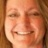

52


In [7]:
display(df['Images'][1])
print(df['Ages'][1])

/tmp/ipykernel_64777/1962184007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'], bins=72)


<Axes: xlabel='Ages', ylabel='Density'>

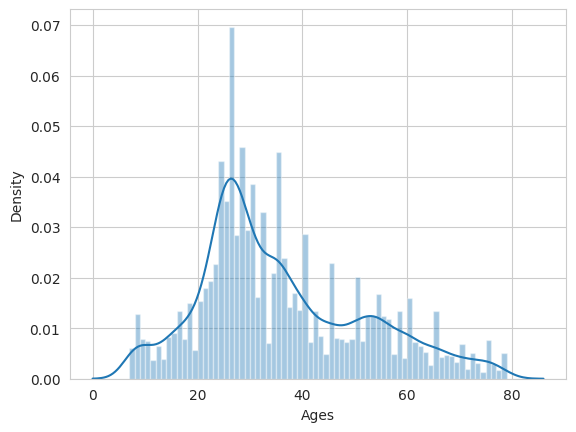

In [8]:
sns.distplot(df['Ages'], bins=72)

In [9]:
df['Ages'].value_counts()

Ages
26    956
28    629
35    617
24    592
30    529
     ... 
64     37
71     27
77     24
74     17
79     17
Name: count, Length: 73, dtype: int64

In [10]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    age = [int(df['Ages'].iloc[i])]
    y.append(age)
x = np.array(x)

/tmp/ipykernel_64777/1731756543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ipykernel_64777/1731756543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ipykernel_64777/1731756543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((48,48))
/tmp/ip

In [11]:
df.head(10)

,Images,Ages
0,<PIL.Image.Image image mode=RGB size=48x48 at ...,62
1,<PIL.Image.Image image mode=RGB size=48x48 at ...,52
2,<PIL.Image.Image image mode=RGB size=48x48 at ...,35
3,<PIL.Image.Image image mode=RGB size=48x48 at ...,50
4,<PIL.Image.Image image mode=RGB size=48x48 at ...,55
5,<PIL.Image.Image image mode=RGB size=48x48 at ...,40
6,<PIL.Image.Image image mode=RGB size=48x48 at ...,54
7,<PIL.Image.Image image mode=RGB size=48x48 at ...,75
8,<PIL.Image.Image image mode=RGB size=48x48 at ...,44
9,<PIL.Image.Image image mode=RGB size=48x48 at ...,26


In [12]:
y_age = df['Ages']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

In [13]:
age_model = Sequential()
age_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Conv2D(64, (3,3), activation='relu'))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Conv2D(128, (3,3), activation='relu'))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Flatten())
age_model.add(Dense(64, activation='relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(1, activation='relu'))
age_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))

2023-11-16 04:17:10.504494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 04:17:10.508931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 04:17:10.509152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
datagen = ImageDataGenerator(rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train1 = datagen.flow(x_train_age, y_train_age, batch_size=64)

In [17]:
test1 = test_datagen.flow(x_test_age, y_test_age, batch_size=64)

In [18]:
history1 = age_model.fit(train1, epochs=30, shuffle=True, validation_data=test1, verbose=1)

Epoch 1/30


2023-11-16 04:17:11.370638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-16 04:17:11.478925: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-16 04:17:11.609435: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-16 04:17:12.253382: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa380dec410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-16 04:17:12.253432: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-11-16 04:17:12.263986: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-16 04:17:12.348212: I ./tensorflow/compiler/jit/

172/172 [==============================] - 6s 23ms/step - loss: 610.6073 - val_loss: 282.7581
Epoch 2/30
172/172 [==============================] - 4s 20ms/step - loss: 318.5858 - val_loss: 275.5892
Epoch 3/30
172/172 [==============================] - 3s 20ms/step - loss: 306.5279 - val_loss: 256.9100
Epoch 4/30
172/172 [==============================] - 3s 20ms/step - loss: 304.7787 - val_loss: 248.8386
Epoch 5/30
172/172 [==============================] - 3s 20ms/step - loss: 288.4902 - val_loss: 245.0727
Epoch 6/30
172/172 [==============================] - 3s 20ms/step - loss: 283.7556 - val_loss: 234.1015
Epoch 7/30
172/172 [==============================] - 4s 20ms/step - loss: 278.2440 - val_loss: 236.8999
Epoch 8/30
172/172 [==============================] - 4s 20ms/step - loss: 272.1062 - val_loss: 226.2588
Epoch 9/30
172/172 [==============================] - 3s 20ms/step - loss: 272.3482 - val_loss: 219.6396
Epoch 10/30
172/172 [==============================] - 3s 20ms/ste

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(age_model.predict(test1), y_test_age)

43/43 [==============================] - 0s 2ms/step


315.53689338686644

In [20]:
save_model(age_model, '../../models/model_age_48.model')
age_model.save_weights('../../models/weights_age_48.h5')

INFO:tensorflow:Assets written to: ../../models/model_age_48.model/assets


INFO:tensorflow:Assets written to: ../../models/model_age_48.model/assets


In [21]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((48,48))
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((48,48))
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((48,48))
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 48, 48, 3)
    
    age = int(age_model.predict(ar))

    print('Age:', age)
    return im.resize((48,48))

1/1 [==============================] - 0s 80ms/step
Age: 42


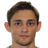

In [22]:
process_and_predict('/home/vorkov/Documents/photo_2023-10-15_15-31-15.jpg')